In [31]:
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import audio_utilities
import matplotlib.pyplot as plt
from IPython.display import Audio
import librosa
from librosa import display
import numpy as np
import sklearn
audio_utilities.ensure_audio()

In [3]:
SR = 16000
src_clean, _ = librosa.load('audio/clean/sp01.wav', sr=SR, mono=True)
src_noise, _ = librosa.load('audio/airport_10dB/sp01_airport_sn10.wav', sr=SR, mono=True)
print(SR)

16000


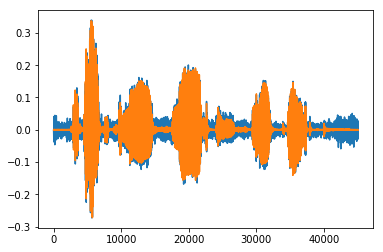

In [23]:
plt.plot(src_noise)
plt.plot(src_clean)

# Fourier Transforms Visualized

http://www.jezzamon.com/fourier/index.html

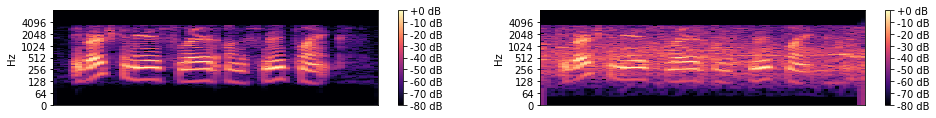

In [29]:
librosa.stft(src_clean)
clean = librosa.amplitude_to_db(np.abs(librosa.stft(src_clean[:3*SR])), ref=np.max)
noise = librosa.amplitude_to_db(np.abs(librosa.stft(src_noise[:3*SR])), ref=np.max)
plt.figure(figsize=(16, 8))
plt.subplot(4, 2, 1)
display.specshow(clean, y_axis='log', sr=SR)
plt.colorbar(format='%+2.0f dB')
plt.subplot(4, 2, 2)
display.specshow(noise, y_axis='log',  sr=SR)
plt.colorbar(format='%+2.0f dB')
Audio(src_clean, rate=SR)

In [26]:
Audio(src_noise, rate=SR)

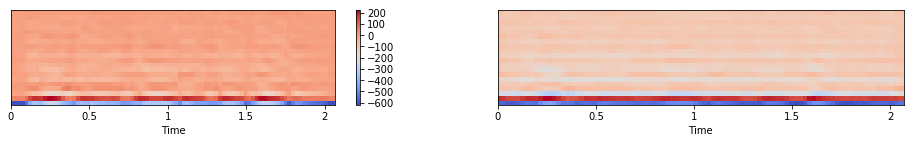

In [27]:
mfcc_clean = librosa.feature.mfcc(src_clean, sr=SR, n_mfcc=20)
mfcc_noise = librosa.feature.mfcc(src_noise, sr=SR, n_mfcc=20)
plt.figure(figsize=(16, 8))
plt.subplot(4, 2, 1)
display.specshow(mfcc_clean, x_axis='time')
plt.colorbar()
plt.subplot(4, 2, 2)
display.specshow(mfcc_noise, x_axis='time')

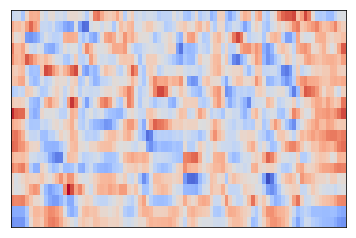

In [32]:
display.specshow(sklearn.preprocessing.scale(mfcc_clean, axis=1))